# Worksheet 2 - Scientific Visualization MVE080/MMG640
## Directory of visualizations, color, and aesthetics

Name: Elvina Fahlgren

This is the second worksheet in the course *Scientific Visualization*. The purpose is to study various types of visualizations and how they are produced in Matplotlib. 

Once you're finished with all the tasks, export this document as an HTML-file and upload it in Canvas.
You are encouraged to discuss problems and solutions with your fellow students (in the class-room but also on CampusWire), but each student must solve all tasks by themselves and hand-in their own report.
Notice that Jupyter notebooks use [Markdown](https://docs.github.com/en/github/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax#links) for writing text cells. Make sure you understand the basics. Later on you can also include $\LaTeX$ in your Markdown cells.

## Setup
Before we begin it is necessary to load a few Python modules that are needed. We can do that with the following commands (which only have to be run once, unless you restart the Jupyter kernel in which case you have to re-run them).

In some of the tasks below we shall use an addon module to Matplotlib called [Seaborn](https://seaborn.pydata.org/index.html). It is entirely possible to solve all the tasks without using Seaborn (if you prefer), but many things are simplified with Seaborn. Furthermore, to handle tabular data (such as the data in an Excel-sheet), we shall use the module [Pandas](https://pandas.pydata.org/). Pandas is an open source data analysis toolbox that connects well with Matplotlib and in particular with Seaborn. Both Pandas and Seaborn are part of the Anaconda Python distribution and can be considered "standard" modules (meaning a lot of code use these modules).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Task 1: colors and directory of visualizations

Read Chapters 4, 19, and 5 of [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/), then answer the questions below.

### Question 1.1
When selecting a color scale (called _colormap_ in Matplotlib and _palette_ in Seaborn), how do the type of data influence the choice of color scale? Give examples.

### Answer 1.1
If we want to distinguish discrete groups of data from each other, a *qualitative* color scale is be a suitable choice. But using too many categories can make the figure hard to read, because it takes a lot of effort to go back and forth between item and matched color. Three to five different categories is good. 

If we want to represent data values which are larger or smaller than which other ones (for example temerature or speed), or visualize distance between data values, it is be a great choice to use a *sequential* color scale.

By using a *diverging* color scale we can visualize the deviation of data values in one of two directions relative to a neutral point. It is important not to use red-green and blue-green contrast since these colors contrasts can become indistinguishable under cvd.

If we would like to highlight specific elements in data, using an *accent* color scale is suitable. 

### Question 1.2
The Seaborn module offers functionality for creating your own color scales.
Read [this tutorial](https://seaborn.pydata.org/tutorial/color_palettes.html) on how to create palettes in Seaborn.
What is a "cubehelix" palette? When is it useful?

### Answer 1.2
A *cubehelix* palette generates sequential palettes with a linear increase or decrease in bightness ans some continuous variation in hue. It is uesful when visualizing data that range between relatively uninteresting low values and interesting high values.

### Task 1.1
Use Seaborn to design your own cubehelix sequential color scale. 
Then, in the tasks below, use this color scale whenever appropriate.

**Hint:** Check out the Seaborn command [`choose_cubehelix_palette`](https://seaborn.pydata.org/generated/seaborn.choose_cubehelix_palette.html#seaborn.choose_cubehelix_palette).

In [2]:
sns.choose_cubehelix_palette(as_cmap=True)

interactive(children=(IntSlider(value=9, description='n_colors', max=16, min=2), FloatSlider(value=0.0, descri…

In [108]:
colorscale_12_colors = sns.cubehelix_palette(start = 2, rot =.55, gamma = 1, hue = .8, light = .9, dark = .15, n_colors = 12)
colorscale_3_colors = sns.cubehelix_palette(start = 2, rot =.55, gamma = 1, hue = .8, light = .9, dark = .15, n_colors = 3)
colorscale = sns.cubehelix_palette(start = 3, rot =-0.5, gamma = 2, hue = .8, light = .9, dark = .20)

cubehelix_palette = sns.cubehelix_palette(start = 3, rot =-0.5, gamma = 2, hue = .8, light = .9, dark = .20, reverse = True, as_cmap=True)
cubehelix_palette_iterable = sns.cubehelix_palette(start = 3, rot =-0.5, gamma = 2, hue = .8, light = .9, dark = .20)

# qualitative color palette 
qualitative_palette = sns.color_palette("Accent")
qualitative_palette_3_colors = sns.color_palette("Accent",3)

In [4]:
sns.color_palette("Accent")

[(0.4980392156862745, 0.788235294117647, 0.4980392156862745),
 (0.7450980392156863, 0.6823529411764706, 0.8313725490196079),
 (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
 (1.0, 1.0, 0.6),
 (0.2196078431372549, 0.4235294117647059, 0.6901960784313725),
 (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
 (0.7490196078431373, 0.3568627450980392, 0.09019607843137253),
 (0.4, 0.4, 0.4)]

### Question 1.3
The author describes 6 different types of 2D plots and discusses briefly their use. In some cases the data you have naturally limits which type of plots you can use (for example geospatial plots require geospatial data). But in many cases it is not at all obvious which type of plot to use. I want you to think carefully about a strategy for selecting which plot to use. This is an "open question", so there's no right or wrong. To help you get going, think about the data visualizations that you've been doing in other courses.

### Answer 1.3
_Explain your strategy for selecting plot type here. Try to be as concrete as possible: give examples of data (anything, either real or made up) and explain how your strategy applies to that data._

*Amount plots* are useful for comparing single data values whithin a category. For example, visualazing difference between popupation in multiple countries.

*Distribution plots* can be useful for visualizing how data values variate whithin the same category. For example, the average temperature in Stockholm during the last five years. 

*Proportion plots* are appropiate to use when displaying precentages values. For example, to show how people answered in a study. 

*x-y relationship plots* are useful when two data values relate to each other and we want to visualize their relatonship. For example, showing how temperature variate during a day.

*Uncertainty plots* are suitable for presenting uncertain data. For example, if the data variates with a specific ± value. 

## Task 2: Pandas for tabular data

![Pandas](https://images.squarespace-cdn.com/content/v1/5268c662e4b0269256614e9a/1562312824569-6LDHKN3X0QPA2ON2CPGZ/pandas-logo-300.png)

First [watch this video introduction to Pandas](https://youtu.be/_T8LGqJtuGc).
Then go to the [Pandas getting started tutorial page](https://pandas.pydata.org/docs/getting_started/intro_tutorials/) and go through the tutorials (you don't have to include the code-cells for this).

As part of this work-sheet you are given 3 files containing temperature data from cities in Sweden (`smhi-gothenburg.csv`, `smhi-stockholm.csv`, and `smhi-malmoe.csv`). The data is saved in the [comma-separated values (CSV)](https://en.wikipedia.org/wiki/Comma-separated_values) format.
This is a tabular format, similar in structure to an Excel sheet.

Write code below to load the 3 CSV files using the Pandas `DataFrame` structure. 
Then combine the 3 data structures in a new `DataFrame` with a new column labelled "City" taking the values "Stockholm", "Gothenburg", or "Malmoe". Save your new Pandas data structure as a new CSV file.

In [196]:
# Your code-cells here

# load CSV files
gothenburg = pd.read_csv("smhi-gothenburg.csv")
malmoe = pd.read_csv("smhi-malmoe.csv")
stockholm = pd.read_csv("smhi-stockholm.csv")

# combine the three city
combined = pd.concat([stockholm, gothenburg, malmoe], keys = ['Stockholm', 'Gothenburg', 'Malmoe'], names = ['City', 'Row ID'])
combined = combined.reset_index(level=['City', 'Row ID'])

# rename
combined = combined.rename({'Month': 'Month_index'}, axis=1)
# new column with month string
combined["Month"] = combined["Month_index"].replace({1 : "Jan", 2 : "Feb", 3: "Mar", 4 : "April", 5 :"May", 6 : "Juni", 7 : "July", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"})

combined.to_csv('smhi-combined.csv')

## Task 3: Seaborn for plotting

![Seaborn](https://cmdlinetips.com/wp-content/uploads/2020/09/Seaborn_logo.png)

Seaborn is a Python data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative graphics. It works especially well together with the Pandas `DataFrame` structure.

### Task 3.1

First work through the [Seaborn introduction](https://seaborn.pydata.org/introduction.html). Notice that the test data used in the tutorial is based on Pandas. You don't have to include the code-cells for the Seaborn tutorials.

### Task 3.2

Read Chapter 6 of [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/).
Using the temperature `DataFrame` from Task 2, create two figures displaying the average temperature during Jan, April, July, and October in the three cities. 
- The first figure should be a **grouped bar plot**, where the group is the city. On the x-axis you should have the months. To generate grouped bar plots with Seaborn, see examples in the [categorical data plotting tutorial](https://seaborn.pydata.org/tutorial/categorical.html).
- The second figure should also be a grouped bar plot, but now the group is the months. On the x-axis you should have the cities.

Try to make your plots as identical as possible to [Figure 6.7 and 6.8 of the book](https://clauswilke.com/dataviz/visualizing-amounts.html) (but of course with different data and labels). To do this, it is helpful to first read the [Seaborn Plot aesthetics tutorial](https://seaborn.pydata.org/tutorial.html).

In [194]:
# data frame of avegare temperature
avg = pd.DataFrame(combined.groupby(["City", "Month_index", "Month"])["Temperature"].mean())
# make 'City' and 'Month to columns
avg = avg.reset_index(level=["City", "Month_index", "Month"])

#### First figure

[(-5.0, 20.0)]

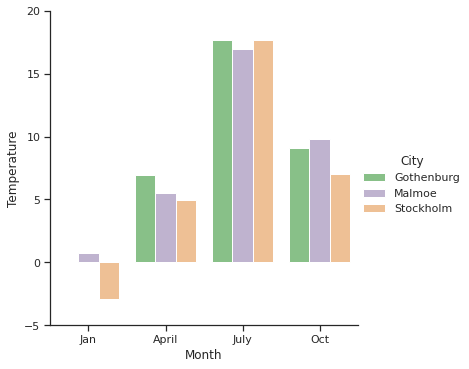

In [192]:
# uses a qualitative color palette since it is good for representing categorical data
plot = sns.catplot(x = "Month", order = ["Jan", "April", "July",  "Oct"], y = "Temperature", hue = "City", palette = qualitative_palette, kind = "bar", data = avg)
plot.ax.set(ylim=(-5,20))

#### Second figure

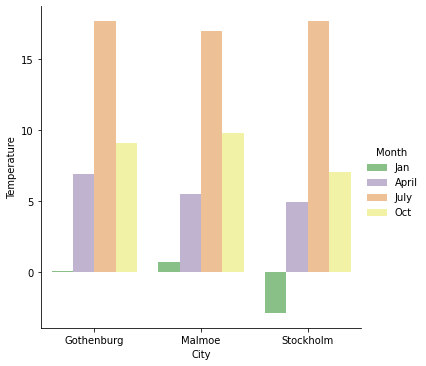

In [8]:
# data frame containing data for only jan, april, july and oct
jan_apr_jul_oct = avg[avg["Month"].isin(["Jan", "April", "July", "Oct"])]
# uses a qualitative color palette because it is good for representing categorical data
plot = sns.catplot(x = "City", y = "Temperature", hue = "Month", hue_order = ["Jan", "April", "July", "Oct"], palette = qualitative_palette, kind = "bar", data = jan_apr_jul_oct)


### Question 3.1

Of the two plots you made in Task 3.2, which one do you think works best? Explain your reasoning.

### Answer 3.1

I think the first figure works best for interpreting the temperature difference between the three cities. In the second figure it is easier to read the different temperatures between the month in each city. However, the second plot could have been divided into induvidual plots for each city since it does not really illustrates the distinction of temperatures between the cities. 

## Task 4: Visualizing distributions

Read Chapter 7 and Chapter 9 of [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/).
Using the temperature data structure that you created in Task 2, create one or several figures displaying the temperature distribution throughout the whole year for each of the three cities. I'm not telling you which of the distribution visualization type to use: make sure you study the figures in Chapters 7 and 9 carefully, judge their pros and cons. You probably need to try many different types of distribution plots (each with one or several figures included) before you settle on which is the best.

**Hint:** Useful information about using Seaborn for visualizing distributions can be found in [this tutorial](https://seaborn.pydata.org/tutorial/distributions.html).

### Question 4.1
Explain, with clear motivations, what made you choose the type of visualization you used. Also, explain all the visualization types you tested and why in the end you did not use them.

### Answer 4.1
_Provide you answer here_

I implemented 

I choosed not to use histogram because the book said it was bad................

#### *Box plot*

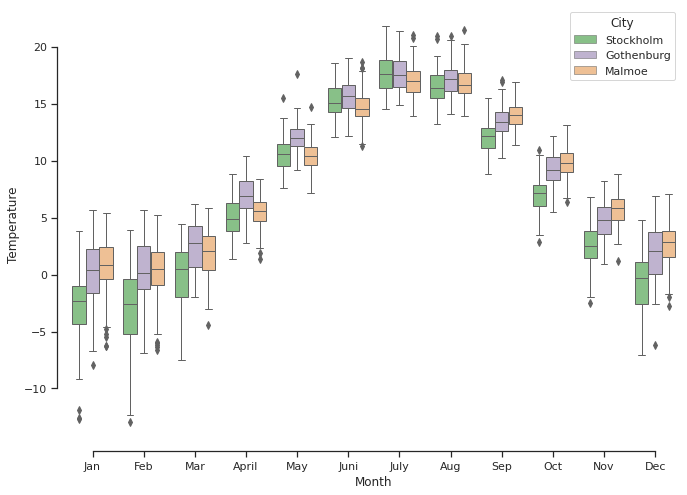

In [185]:
sns.set_theme(style="ticks", rc={'figure.figsize':(11,8)})

box_plot = sns.boxplot(x = "Month", y = "Temperature",
            hue = "City", data = combined, palette = qualitative_palette, linewidth = 1)
sns.despine(offset=10, trim=True)


#### *Violin plot*

<AxesSubplot:xlabel='Month', ylabel='Temperature'>

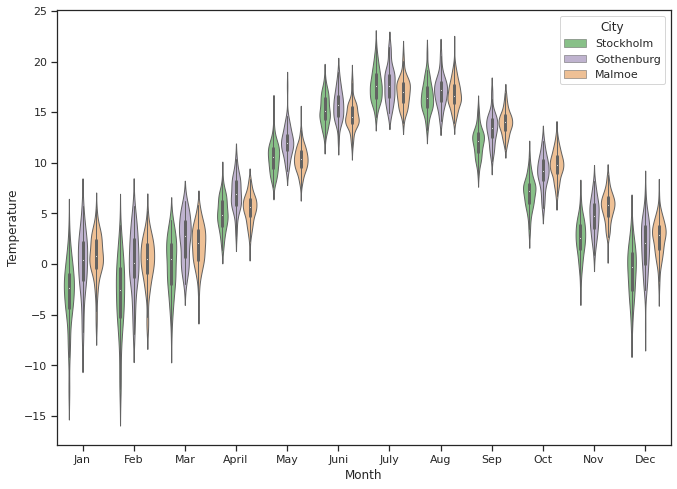

In [186]:
sns.violinplot(x = "Month", y = "Temperature",
            hue = "City", data = combined, palette = qualitative_palette, linewidth = 1)

#### *Distrubution plots for every month*
This plot contains many subplots and it is therefore hard to see variation throughout the whole year.

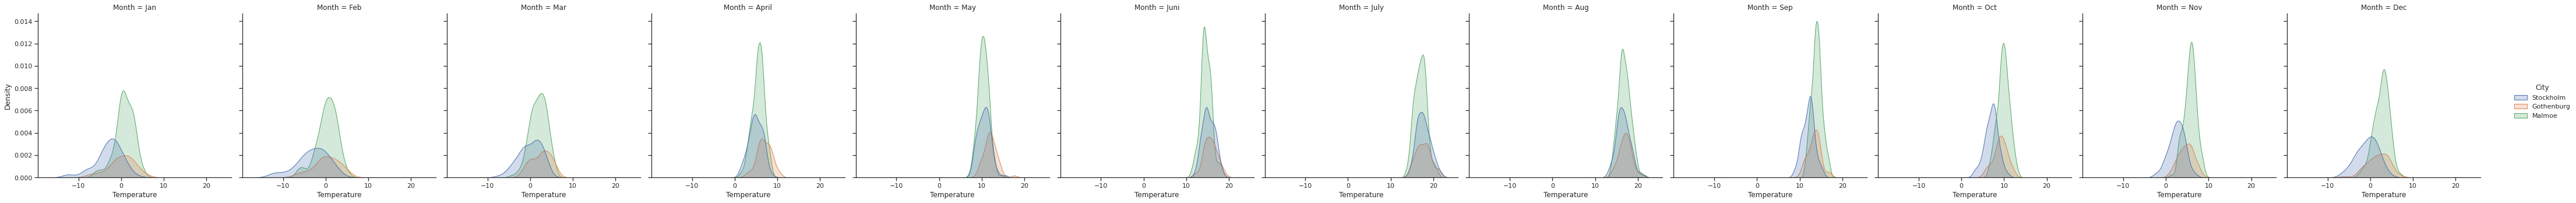

In [190]:
g = sns.displot(data=combined, x="Temperature", hue="City", col="Month", kind="kde", fill = True)

#### *Ridgeline plot*

In this plot, it is easier to interpret the temperatures during the whole year. However, I did not manage to get the graphs to overlap each other which may have a negative impact on its appearence. The legend does not look quite right either.

/home/elvina/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


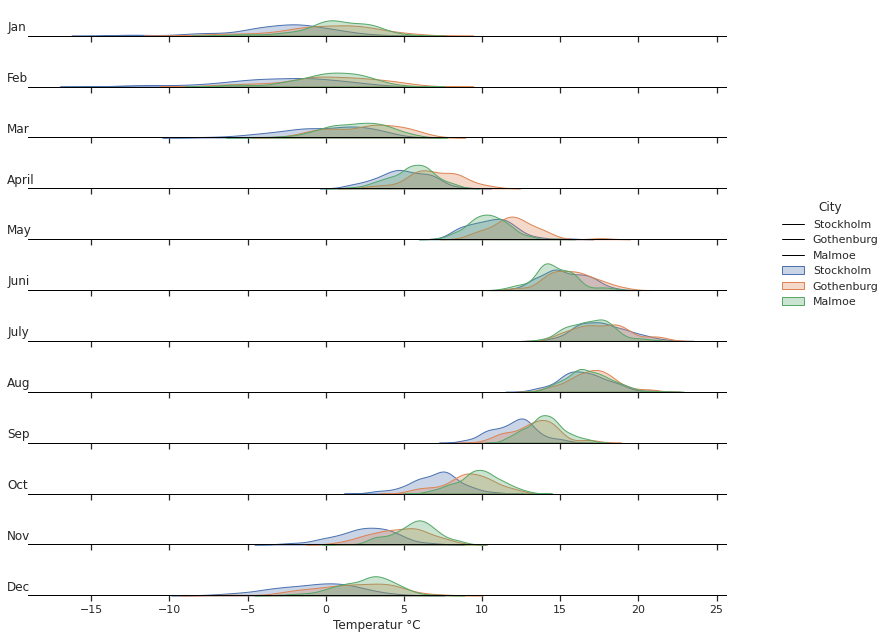

In [178]:
ridge_plot = sns.FacetGrid(combined, row="Month", hue="City", aspect=15, height=0.5)
# Draw the densities in a few steps
ridge_plot.map(sns.kdeplot, "Temperature", clip_on=False, shade=True, alpha=0.3, lw=1, bw_adjust=.9)
ridge_plot.map(plt.axhline, y=0, lw=1, color = "black", clip_on=False)
for i, ax in enumerate(ridge_plot.axes.flat):     
        ax.text(-0.03, .3, combined.Month[i], fontweight="regular", ha="left", va="center", transform=ax.transAxes)

ridge_plot.tight_layout(pad=-8, h_pad=False)
#ridge_plot_combined.fig.subplots_adjust(hspace=-0.01)
ridge_plot.set_titles("")
ridge_plot.set(yticks=[])
ridge_plot.despine(bottom=True, left=True)
ax = plt.gca()
ax.set_xlabel("Temperatur °C")
trash = ax.legend(title='City', frameon = False, bbox_to_anchor=[1.15, 14], loc = 'upper center')
#ridge_plot.savefig("Ridgeline_plot_Seaborn_Python.png")

## Task 5: Visualizing time-series and trends

![Image](https://seaborn.pydata.org/_images/regression_17_0.png)

Read Chapter 13 and Chapter 14 of [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/).

### Task 5.1

Use the temperature data from Task 2 to display, for each city, how temperature is varying with month of the year. Do it in three different ways:

1. Using an x-y-scatter plot (with month on the x-axis, and make sure the ticks are labelled by month names, not numbers).
2. Using a polar scatter plot, with angle corresponding to the month scale and radius corresponding to the temperature scale. Take into account that the average temperature during some months are negative.
3. Using a _heat map_, similar to Figure 2.4 in [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/). Remember to use your own cubehelix palette.

#### *Scatter plot*

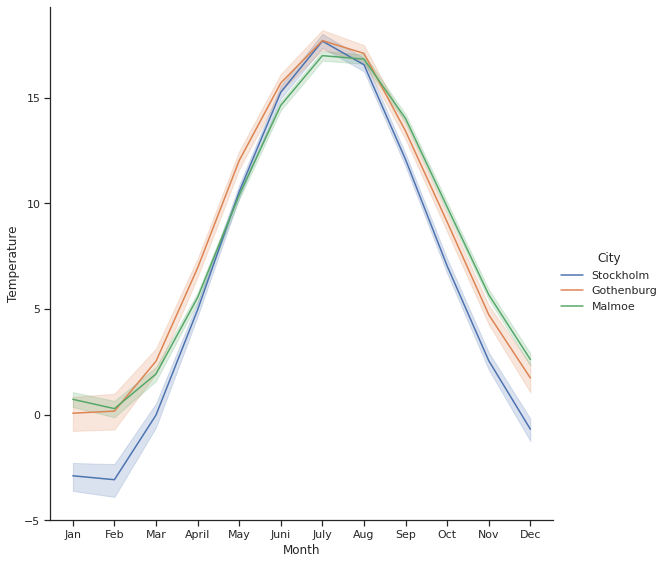

In [ ]:
sns.relplot(x = 'Month', y = 'Temperature', kind = 'line', hue = 'City', data = combined, height=8)

#### *Polar scatter plot*

Text(0.5, 9.687500000000028, 'Month')

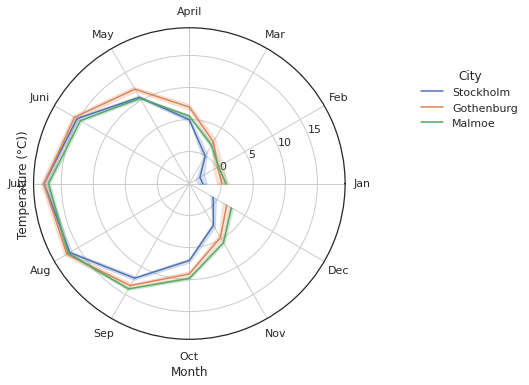

In [ ]:
tick_angles = [2.*np.pi*k/12. for k in range(12)]
a={}
for i in range(12):
    a[i+1]=tick_angles[i]

combined["Month_tick"] = combined["Month_index"].replace(a)

# Set up a grid of axes with a polar projection
g = sns.FacetGrid(combined, subplot_kws=dict(projection='polar'), height=5.5,
                  sharex=False, sharey=False, despine=False, palette=qualitative_palette)

g.map(sns.lineplot,"Month_tick", "Temperature",  "City")
ax = plt.gca()
trash=ax.xaxis.set_ticks(tick_angles)

trash=ax.xaxis.set_ticklabels(["Jan", "Feb", "Mar", "April", "May", "Juni", "July", "Aug", "Sep", "Oct", "Nov", "Dec"])
ax.yaxis.set_label("Temperature (°C))")
ax.legend(title='City', frameon = False, bbox_to_anchor=[1.4, 0.9], loc = 'upper center')
ax.set_ylabel("Temperature (°C))")
ax.set_xlabel("Month")

#### *Heat map*

Text(0.5, 3.5, 'Month')

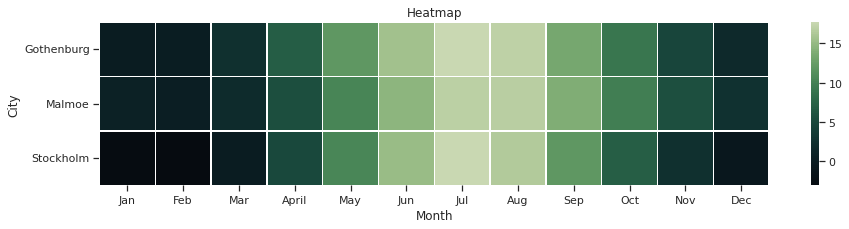

In [ ]:

fig, ax = plt.subplots(1)

fig.set_size_inches(15, 3)

filtered_data = avg[["City", "Temperature", "Month_index"]]

filtered_data = filtered_data.pivot("City", "Month_index", "Temperature")

sns.heatmap(filtered_data, linewidths=.5, ax = ax, cmap = cubehelix_palette)

xticks_labels = ['Jan', 'Feb', 'Mar', 'April', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(12) + .5, labels=xticks_labels)
plt.title("Heatmap")
plt.xlabel("Month")

### Question 5.1

Chapter 14 discusses the LOESS smoother. In Seaborn the [LOWESS smoother](https://en.wikipedia.org/wiki/Local_regression) is implemented. When is it appropriate to use a smoother? What is the difference between LOESS and LOWESS?

### Answer 5.1
_Your answer here_

LOESS stand for *locally estimated scatterplot smoothing* and LOWESS stand for *locally weighted scatterplot smoothing*. The difference between these smoothers is that 

### Task 5.1

Based on what you've learned in Chapter 14 and 15, make a visualization that for each city shows the temperature trends for January, April, July, and October from 1961 to today. Try various types of regression models, motivate your choice. Also motivate why you choose to include or not to include scatter plots and/or confidence intervals in your final plot.

**Hint:** Read the [Seaborn tutorial on regression models](https://seaborn.pydata.org/tutorial/regression.html).

In [191]:
# Your code-cells here

_Your markdown cells here explaining and motivating your choices_

## Task 6: Reflection

### Question 6.1
In general, when you create a visualization of some data it is because you want to illustrate something about the data. In Tasks 3-5 above you have used the same data (average monthly temperatures in three cities) to produce many different plots. What particular aspect of the data are you conveying in each plot? This question is a bit like Jeopardy: I give you the answers (your plots), you give me the questions (what aspects of the data are the plots showing).

### Answer 6.1

_Your answer here_